# Data Analytics Coursework  

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset
 Print the shape of the dataframe

In [3]:
df = pd.read_csv('london.csv', sep=',',  header=0)
df.shape

(3154384, 17)

 Visualise first 2 rows

In [36]:
df.head(2)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,3,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
1,9,{DF2A5520-3FFF-4970-BE62-B2E652EAF0DB},139950,1995-09-15 00:00,HA5 2TP,D,N,F,1,NaN,BURLINGTON CLOSE,PINNER,PINNER,HILLINGDON,GREATER LONDON,A,A


 Remove the first column

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.shape

(3154384, 16)

In [6]:
df.rename(columns={'V1':'uniqueId',
                   'V2':'Price',
                    'V3':'dateOfTransfer',
                    'V4':'postCode',
                    'V5':'propertyType',
                    'V6':'oldNew',
                    'V7':'duration',
                    'V8':'PAON',
                    'V9':'SAON',
                    'V10':'Street',
                    'V11':'locality',
                    'V12':'townCity',
                    'V13':'district',
                    'V14':'county',
                    'V15':'ppdCategoryType',
                    'V16':'recordStatus'},
          inplace = True)
df.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
0,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
1,{DF2A5520-3FFF-4970-BE62-B2E652EAF0DB},139950,1995-09-15 00:00,HA5 2TP,D,N,F,1,NaN,BURLINGTON CLOSE,PINNER,PINNER,HILLINGDON,GREATER LONDON,A,A


In [7]:
df.groupby(['district']).size()

district
BARKING AND DAGENHAM       59328
BARNET                    134914
BEXLEY                     96381
BRENT                      84073
BROMLEY                   147072
CAMDEN                     77010
CITY OF LONDON              7978
CITY OF WESTMINSTER       112868
CROYDON                   146442
EALING                    111192
ENFIELD                   115861
GREENWICH                  93448
HACKNEY                    67323
HAMMERSMITH AND FULHAM     77426
HARINGEY                   82522
HARROW                     78495
HAVERING                   93656
HILLINGDON                103721
HOUNSLOW                   86017
ISLINGTON                  69393
KENSINGTON AND CHELSEA     80318
KINGSTON UPON THAMES       74723
LAMBETH                   118519
LEWISHAM                  109099
MERTON                     87295
NEWHAM                     87333
REDBRIDGE                 102181
RICHMOND UPON THAMES       97114
SOUTHWARK                 101268
SUTTON                     90179
T

In [45]:
df.groupby(['district'])['Price'].agg('sum')

district
BARKING AND DAGENHAM       9874506774
BARNET                    46536940185
BEXLEY                    18692198020
BRENT                     24330293865
BROMLEY                   40604628207
CAMDEN                    47915785821
CITY OF LONDON            11417487584
CITY OF WESTMINSTER       99867550921
CROYDON                   32431530872
EALING                    34130286885
ENFIELD                   26349250211
GREENWICH                 23776511206
HACKNEY                   22287297237
HAMMERSMITH AND FULHAM    39316907127
HARINGEY                  25273355623
HARROW                    21751840846
HAVERING                  20401342520
HILLINGDON                26821241853
HOUNSLOW                  24823288483
ISLINGTON                 30207779050
KENSINGTON AND CHELSEA    76635226602
KINGSTON UPON THAMES      22548354939
LAMBETH                   38402284000
LEWISHAM                  25029229939
MERTON                    28060974481
NEWHAM                    18271227125
RED

Subset of year 2018

In [19]:
#df.plot(kind='bar',x='district',y='Price')
df_2018 = df[pd.DatetimeIndex(df['dateOfTransfer']).year == 2018]
#pd.DatetimeIndex(df['dateOfTransfer']).year == 2018

Plot of 2018

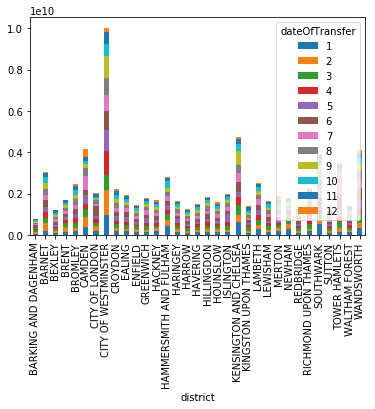

In [20]:
df_2018.groupby(['district',pd.DatetimeIndex(df_2018['dateOfTransfer']).month])['Price'].agg('sum').unstack().plot(kind='bar',stacked=True)
plt.show()